### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

### Get Data

In [18]:
dat = pd.read_pickle('./data/processed/final/all-sched.pkl')
dat.head()

,operator,flight,aircraft,frequency,from,from_time,to,to_time,eff_from,eff_to
0,IND,6E 101,A 320,"[1, 2, 3, 4, 5, 6, 7]",MAA,6.25,CJB,7.25,2019-10-27 00:00:00,2020-03-28 00:00:00
1,IND,6E 103,A 320,"[1, 2, 3, 4, 5, 6, 7]",PNQ,22.33,BLR,0.08,2019-10-27 00:00:00,2020-03-28 00:00:00
2,IND,6E 104,A 320,"[1, 2, 3, 4, 5, 6, 7]",HYD,8.17,ATQ,11,2019-10-27 00:00:00,2020-03-28 00:00:00
3,IND,6E 105,A 320,"[1, 2, 3, 4, 5, 7]",PNQ,17.33,BLR,18.92,2019-10-27 00:00:00,2020-03-28 00:00:00
4,IND,6E 105,A 320,"[1, 2, 3, 4, 5, 7]",DEL,14.75,PNQ,16.83,2019-10-27 00:00:00,2020-03-27 00:00:00


In [24]:
# Adding a column to capture weekly number of flights for the schedule
dat['weekly_flights'] = dat.apply(lambda row: len(row.frequency), axis = 1)
dat.head()

,operator,flight,aircraft,frequency,from,from_time,to,to_time,eff_from,eff_to,weekly_flights
0,IND,6E 101,A 320,"[1, 2, 3, 4, 5, 6, 7]",MAA,6.25,CJB,7.25,2019-10-27 00:00:00,2020-03-28 00:00:00,7
1,IND,6E 103,A 320,"[1, 2, 3, 4, 5, 6, 7]",PNQ,22.33,BLR,0.08,2019-10-27 00:00:00,2020-03-28 00:00:00,7
2,IND,6E 104,A 320,"[1, 2, 3, 4, 5, 6, 7]",HYD,8.17,ATQ,11,2019-10-27 00:00:00,2020-03-28 00:00:00,7
3,IND,6E 105,A 320,"[1, 2, 3, 4, 5, 7]",PNQ,17.33,BLR,18.92,2019-10-27 00:00:00,2020-03-28 00:00:00,6
4,IND,6E 105,A 320,"[1, 2, 3, 4, 5, 7]",DEL,14.75,PNQ,16.83,2019-10-27 00:00:00,2020-03-27 00:00:00,6


We create a new dataframe that captures the total weekly flights (across all carriers) in and out of a city and infer the total number of flights (incoming and outgoing) at the city. Finally we arrange the rows in the descending order of the total number of flights.

In [120]:
flights_from = dat.groupby(['from']).sum()
flights_to = dat.groupby(['to']).sum()
city_weekly = pd.DataFrame(data = pd.concat([flights_from, flights_to], axis = 1, ignore_index = True))
city_weekly = city_weekly.fillna(0, axis = 1, downcast = 'infer') # if there are no flights either from or 
                                                                  # to a city, replace NA by 0
city_weekly = city_weekly.rename(columns = {0:'From', 1:'To'}, errors = 'raise')
city_weekly['Total'] = city_weekly.apply(lambda row : row.From + row.To, axis = 1)
weekly_total = city_weekly['Total'].sum()
city_weekly['%_of_all'] = city_weekly.apply(lambda row : round(100*row.Total/weekly_total, 2), axis = 1)
city_weekly = city_weekly.sort_values(by = ['Total'], ascending = False)
city_weekly.head(15)

,From,To,Total,%_of_all
DEL,3513,3491,7004,15.95
BOM,2259,2270,4529,10.31
BLR,2139,2122,4261,9.70
HYD,1732,1727,3459,7.88
CCU,1447,1419,2866,6.53
MAA,1347,1379,2726,6.21
AMD,764,750,1514,3.45
PNQ,533,533,1066,2.43
GOI,514,513,1027,2.34
GAU,462,438,900,2.05


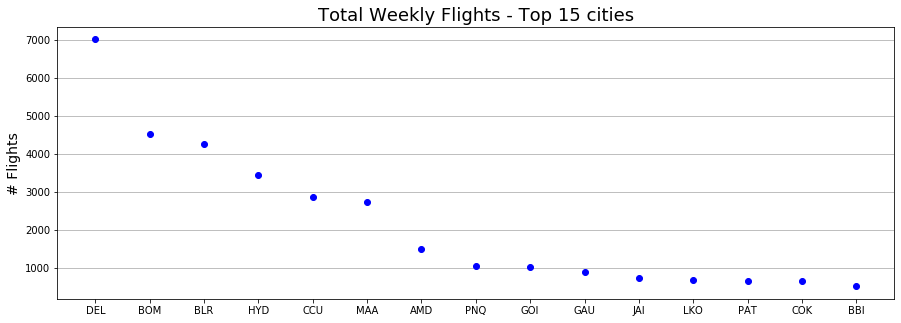

In [121]:
plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True

plt.figure(figsize = (15, 5))
plt.plot(city_weekly['Total'].head(15), 'bo')
#plt.xlabel('Cities', size = 24)
plt.ylabel('# Flights', size = 14)
plt.title('Total Weekly Flights - Top 15 cities', size = 18)

plt.show()